### Treść zadania

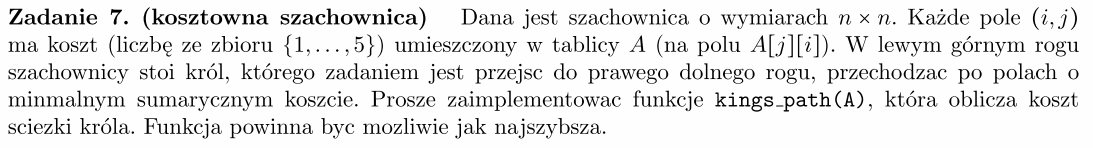

# 1) Z użyciem algorytmu Dijkstry

### Omówienie algorytmu

Opis algorytmu znajduje się tutaj: https://levelup.gitconnected.com/dijkstras-shortest-path-algorithm-in-a-grid-eb505eb3a290 <br>
W poniższej implementacji korzystamy z algorytmu Dijkstry.

### Złożoność

$ O(E \cdot log(V)) = O((8 \cdot(n^2)) \cdot log(n^2)) = O(n^2 \cdot log(n)) = O(n^2 \cdot log(n)) $  - Bo nasz grid ma wymiary $ n \times n $ oraz z każdego pola sprawdzamy w przybliżeniu 8 sąsiednich pól.
###### Obliczeniowa:
$ O(n^2 \cdot log(n)) $
###### Pamięciowa:
$ O(n^2) $

### Implementacja

In [1]:
from queue import PriorityQueue


def dijkstra(G: 'grid'):
    moves = [(-1, 0), (-1, 1), (0, 1), (1, 1), (1, 0), (1, -1), (0, -1), (-1, -1)]
    
    n = len(G)
    inf = float('inf')
    visited = [[False] * n for _ in range(n)]
    parents = [[None] * n for _ in range(n)]
    cost    = [[inf] * n for _ in range(n)]
    cost[0][0] = G[0][0]
    # Initialize a priority queue where we will store (vertex, min distance) pairs
    # sorted by the minimum priority
    pq = PriorityQueue()
    pq.put((0, 0, 0))
    
    while not pq.empty():
        min_cost, i, j = pq.get()
        visited[i][j] = True  # Mark as visited
        # Skip a vertex if there was already found a better distance
        if cost[i][j] < min_cost: continue
        # Loop over all the neighbours and check if we can update some of them
        for d_i, d_j in moves:
            new_i = i + d_i
            new_j = j + d_j
            if 0 <= new_i < n and 0 <= new_j < n and not visited[new_i][new_j]:
                new_cost = cost[i][j] + G[new_i][new_j]
                # Update the distance from source to v vertex if found a shorter path
                if new_cost < cost[new_i][new_j]:
                    cost[new_i][new_j] = new_cost
                    parents[new_i][new_j] = (i, j)
                    pq.put((new_cost, new_i, new_j))
                
    # Otherwise, we cannot reach the target
    return cost[-1][-1], parents


def restore_path(parents):
    n = len(parents)
    i = j = n - 1
    result = []
    while parents[i][j]:
        result.append((i, j))
        i, j = parents[i][j]
    result.append((i, j))
    return result[::-1]
        
    
def kings_path(G: 'grid'):
    cost, parents = dijkstra(G)
    return cost, restore_path(parents)

###### Kilka testów

In [2]:
from random import randint, seed

gen_A = lambda n: [[randint(1, 5) for _ in range(n)] for _ in range(n)]

In [3]:
seed(22)
A = gen_A(5)
print(*A, sep='\n')
print(kings_path(A))

[2, 2, 1, 5, 4]
[2, 1, 3, 1, 2]
[3, 1, 3, 5, 2]
[5, 4, 1, 5, 1]
[5, 3, 3, 4, 2]
(10, [(0, 0), (1, 1), (0, 2), (1, 3), (2, 4), (3, 4), (4, 4)])


In [4]:
seed(37)
A = gen_A(12)
print(*A, sep='\n')
print(kings_path(A))

[5, 1, 5, 5, 1, 3, 4, 5, 1, 4, 5, 3]
[4, 4, 4, 2, 1, 1, 4, 1, 5, 3, 3, 4]
[5, 5, 3, 5, 1, 5, 5, 2, 5, 4, 1, 1]
[1, 5, 3, 1, 5, 2, 1, 3, 3, 5, 2, 1]
[1, 2, 3, 2, 5, 3, 5, 1, 3, 3, 2, 4]
[2, 2, 3, 5, 1, 4, 4, 1, 5, 1, 3, 2]
[1, 4, 2, 3, 3, 1, 1, 2, 1, 5, 2, 5]
[2, 5, 3, 4, 1, 5, 2, 5, 3, 2, 2, 1]
[2, 4, 5, 5, 5, 1, 3, 3, 1, 5, 1, 2]
[2, 4, 4, 3, 1, 2, 1, 3, 1, 2, 2, 4]
[5, 4, 3, 5, 3, 5, 1, 5, 2, 3, 1, 3]
[5, 5, 1, 3, 5, 4, 2, 3, 5, 3, 2, 3]
(28, [(0, 0), (0, 1), (1, 2), (1, 3), (2, 4), (3, 5), (3, 6), (4, 7), (5, 7), (6, 8), (7, 9), (8, 8), (9, 9), (10, 10), (11, 11)])


# 2) Z użyciem pomocnicznego grafu

### Omówienie algorytmu

Ponieważ wartości w polach są bardzo małe (z zakresu $ \{1, 2, 3, 4, 5\} $), możemy utworzyć graf, w którym krawędzie ważone przedstawimy jako zwielokrotnienie krawędzi, a dokładniej zamiast np. krawędzi o wadze 5, w jej miejsce wstawimy ścieżkę o długości równiej $ 5 $ (zatem konieczne jest umieszczenie na tej krawędzi 4 dodatkowych wierzchołków, aby otrzymać ścieżkę). Później możemy już użyć zwykłego algortmu BFS do znalezienia najkrótszej ścieżki.
###### UWAGA:
Ten algorytm jest również szybszy od wyżej zaprezentowanego algorytmu Dijkstry, ale tylko z tego powodu, że liczba krawędzi jest ograniczona przez stałą (max. 5 razy więcej niż w przpadku rozważanym przez algorytm Dijkstry).
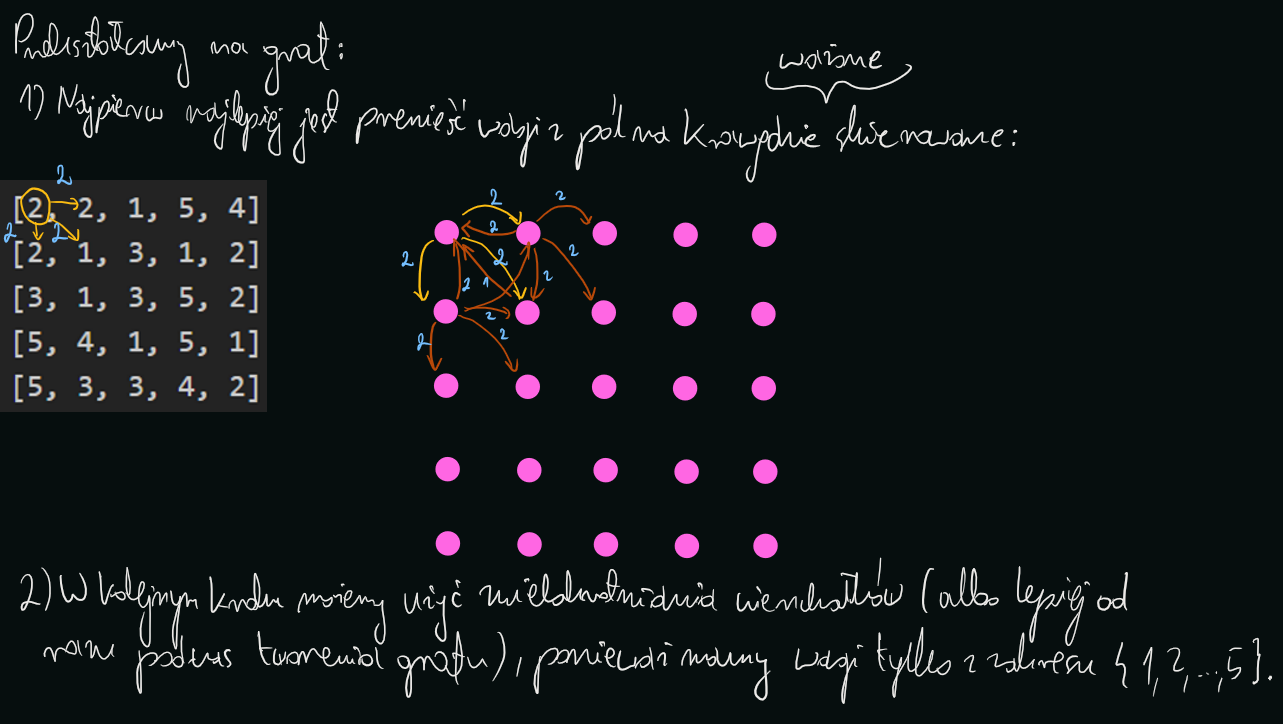

### Złożoność

W naszym przypadku możemy tę złożoność oszacować właśnie przez $ O(V + E) = O(n^2 + 5 \cdot 8 \cdot n^2) = O(41 \cdot n^2) = O(n^2) $ - Z każdego wierzchołka wychodzi w przybliżeniu 8 krawędzi (dla krańcowych jest mniej) oraz każda krawędź może zostać hipotetycznie rozbita na 5 krawędzi, stąd takie oszacowanie.
###### Obliczeniowa:
$ O(n^2) $
###### Pamięciowa:
$ O(n^2) $ - na reprezentację grafu, przy pomocy list sąsiedztwa.

### Implementacja #1
##### (Sama długość ścieżki)

In [5]:
from queue import Queue


def create_graph(A: 'grid'):
    n = len(A)
    G = [[] for _ in range(n ** 2)]
    
    moves = [(-1, 0), (-1, 1), (0, 1), (1, 1), (1, 0), (1, -1), (-1, 0), (-1, -1)]
    
    for i in range(n):
        for j in range(n):
            for d_i, d_j in moves:
                new_i = i + d_i
                new_j = j + d_j
                if 0 <= new_i < n and 0 <= new_j < n:
                    # Map coordinates to the indices of vertices
                    u = i * n + j
                    v = new_i * n + new_j
                    # Add a path of k elements where k is A[i][j]
                    add_edge(G, u, v, A[i][j])
    return G


def add_edge(G, u, v, weight):
    if weight == 1: return G[u].append(v)
    w = len(G)  # added w vertex index
    
    for _ in range(weight - 1):
        G[u].append(w)
        G.append([])
        u = w
        w += 1
    
    w -= 1 
    G[w].append(v)
    
# Traditional BFS algorithm for finding a length of the shortest path
def kings_path(A: 'grid', s: 'start' = None, t: 'target' = None):
    n = len(A)
    if not s: s = (0, 0)
    if not t: t = (n - 1, n - 1)
        
    G = create_graph(A)
    dist = [-1] * len(G)
    q = Queue()
    
    start_u = s[0] * n + s[1]
    end_u   = t[0] * n + t[1]
    dist[start_u] = 0
    q.put(start_u)
    
    while not q.empty():
        u = q.get()
        if u == end_u: break
        for v in G[u]:
            if dist[v] < 0:
                dist[v] = dist[u] + 1
                q.put(v)
    
    return dist[end_u] + A[t[0]][t[1]]

###### Kilka testów

In [6]:
from random import randint, seed

gen_A = lambda n: [[randint(1, 5) for _ in range(n)] for _ in range(n)]

In [7]:
seed(22)
A = gen_A(5)
print(*A, sep='\n')
print(kings_path(A))

[2, 2, 1, 5, 4]
[2, 1, 3, 1, 2]
[3, 1, 3, 5, 2]
[5, 4, 1, 5, 1]
[5, 3, 3, 4, 2]
10


In [8]:
seed(37)
A = gen_A(12)
print(*A, sep='\n')
print(kings_path(A))

[5, 1, 5, 5, 1, 3, 4, 5, 1, 4, 5, 3]
[4, 4, 4, 2, 1, 1, 4, 1, 5, 3, 3, 4]
[5, 5, 3, 5, 1, 5, 5, 2, 5, 4, 1, 1]
[1, 5, 3, 1, 5, 2, 1, 3, 3, 5, 2, 1]
[1, 2, 3, 2, 5, 3, 5, 1, 3, 3, 2, 4]
[2, 2, 3, 5, 1, 4, 4, 1, 5, 1, 3, 2]
[1, 4, 2, 3, 3, 1, 1, 2, 1, 5, 2, 5]
[2, 5, 3, 4, 1, 5, 2, 5, 3, 2, 2, 1]
[2, 4, 5, 5, 5, 1, 3, 3, 1, 5, 1, 2]
[2, 4, 4, 3, 1, 2, 1, 3, 1, 2, 2, 4]
[5, 4, 3, 5, 3, 5, 1, 5, 2, 3, 1, 3]
[5, 5, 1, 3, 5, 4, 2, 3, 5, 3, 2, 3]
28


### (Dodatkowo) Implementacja #2
##### (Odtwarzanie ścieżki)

In [9]:
from queue import Queue


def create_graph(A: 'grid'):
    n = len(A)
    G = [[] for _ in range(n ** 2)]
    
    moves = [(-1, 0), (-1, 1), (0, 1), (1, 1), (1, 0), (1, -1), (-1, 0), (-1, -1)]
    
    for i in range(n):
        for j in range(n):
            for d_i, d_j in moves:
                new_i = i + d_i
                new_j = j + d_j
                if 0 <= new_i < n and 0 <= new_j < n:
                    # Map coordinates to the indices of vertices
                    u = i * n + j
                    v = new_i * n + new_j
                    # Add a path of k elements where k is A[i][j]
                    add_edge(G, u, v, A[i][j])
    return G


def add_edge(G, u, v, weight):
    if weight == 1: return G[u].append(v)
    w = len(G)  # added w vertex index
    
    for _ in range(weight - 1):
        G[u].append(w)
        G.append([])
        u = w
        w += 1
    
    w -= 1 
    G[w].append(v)

# Almost traditional BFS algorithm (except that we shouldn't store
# vertices which are used as weights as parents of the grid vertices):
def kings_path(A: 'grid', s: 'start' = None, t: 'target' = None):
    n = len(A)
    if not s: s = (0, 0)
    if not t: t = (n - 1, n - 1)
        
    G = create_graph(A)
    m = len(G)
    parents = [-1] * m
    q = Queue()
    
    start_u = s[0] * n + s[1]
    end_u   = t[0] * n + t[1]
    parents[start_u] = float('inf')
    q.put(start_u)
    
    while not q.empty():
        u = q.get()
        if u == end_u: break
        for v in G[u]:
            if parents[v] < 0:
                q.put(v)
                if u < n ** 2: parents[v] = u
                else: parents[v] = parents[u]
                
#     print(start_u, end_u, parents)
    path = restore_path(parents, start_u, end_u, n)
    cost = calc_cost(A, path)
    
    return cost, path


def restore_path(parents, u, v, n):
    path = [to_coords(v, n)]
    while v != u:
        v = parents[v]
        path.append(to_coords(v, n))
    return path[::-1]


def to_coords(v, n):
    return divmod(v, n)


def calc_cost(A, path):
    cost = 0
    for i, j in path: cost += A[i][j]
    return cost

###### Kilka testów

In [10]:
from random import randint, seed

gen_A = lambda n: [[randint(1, 5) for _ in range(n)] for _ in range(n)]

In [11]:
seed(22)
A = gen_A(5)
print(*A, sep='\n')
print(kings_path(A))

[2, 2, 1, 5, 4]
[2, 1, 3, 1, 2]
[3, 1, 3, 5, 2]
[5, 4, 1, 5, 1]
[5, 3, 3, 4, 2]
(10, [(0, 0), (1, 1), (0, 2), (1, 3), (2, 4), (3, 4), (4, 4)])


In [12]:
seed(37)
A = gen_A(12)
print(*A, sep='\n')
print(kings_path(A))

[5, 1, 5, 5, 1, 3, 4, 5, 1, 4, 5, 3]
[4, 4, 4, 2, 1, 1, 4, 1, 5, 3, 3, 4]
[5, 5, 3, 5, 1, 5, 5, 2, 5, 4, 1, 1]
[1, 5, 3, 1, 5, 2, 1, 3, 3, 5, 2, 1]
[1, 2, 3, 2, 5, 3, 5, 1, 3, 3, 2, 4]
[2, 2, 3, 5, 1, 4, 4, 1, 5, 1, 3, 2]
[1, 4, 2, 3, 3, 1, 1, 2, 1, 5, 2, 5]
[2, 5, 3, 4, 1, 5, 2, 5, 3, 2, 2, 1]
[2, 4, 5, 5, 5, 1, 3, 3, 1, 5, 1, 2]
[2, 4, 4, 3, 1, 2, 1, 3, 1, 2, 2, 4]
[5, 4, 3, 5, 3, 5, 1, 5, 2, 3, 1, 3]
[5, 5, 1, 3, 5, 4, 2, 3, 5, 3, 2, 3]
(28, [(0, 0), (0, 1), (1, 2), (1, 3), (2, 4), (3, 5), (3, 6), (4, 7), (5, 7), (6, 8), (7, 9), (8, 10), (9, 10), (10, 10), (11, 11)])


# 3) Sprytny sposób (najlepszy)
### (Z wrzucaniem wartości kilka razy do kolejki)

Podobne podejście zostało opisane i przedstawione <a href="../../../Pozostałe zadania/Zadania BIT Algo/9. Zajęcia/Zadanie 3. (Żeglarz Henryk - grafy).ipynb">TUTAJ</a>

### Złożoność

###### Obliczeniowa:
$ O(n^2) $
###### Pamięciowa:
$ O(n^2) $  - bo musimy zapisywać, które były odwiedzone

### Implementacja #1
##### (Sama długość ścieżki)

In [13]:
from queue import Queue


def kings_path(A: 'grid', s: 'start' = None, t: 'target' = None):
    n = len(A)
    if not s: s = (0, 0)
    if not t: t = (n - 1, n - 1)
    # Treat cost as distance
    dist = [[-1] * n for _ in range(n)]
    dist[s[0]][s[1]] = 0
    q = Queue()
    q.put([s[0], s[1], 0, s[0], s[1]])
    
    moves = [(-1, 0), (-1, 1), (0, 1), (1, 1), (1, 0), (1, -1), (-1, 0), (-1, -1)]
    
    while not q.empty():
        data = q.get()
        i = data[0]
        j = data[1]
        w = data[2]  # the remaining weight
        # Continue if visited before
        if dist[i][j] > 0: continue
        # Decrease a weight if still cannot enter this field
        if w:
            data[2] -= 1
            q.put(data)
        # Otherwise, mark a field as visited and look for a next field to visit
        else:
            # Get parents indices
            pi = data[3]
            pj = data[4]
            dist[i][j] = dist[pi][pj] + A[i][j]
            
            # Break the loop if reached the target
            if i == t[0] and j == t[1]: break
            
            for d_i, d_j in moves:
                new_i = i + d_i
                new_j = j + d_j
                if 0 <= new_i < n and 0 <= new_j < n and dist[new_i][new_j] < 0:
                    q.put([new_i, new_j, A[new_i][new_j] - 1, i, j])
                    
    return dist[t[0]][t[1]]

###### Kilka testów

In [14]:
from random import randint, seed

gen_A = lambda n: [[randint(1, 5) for _ in range(n)] for _ in range(n)]

In [15]:
seed(22)
A = gen_A(5)
print(*A, sep='\n')
print(kings_path(A))

[2, 2, 1, 5, 4]
[2, 1, 3, 1, 2]
[3, 1, 3, 5, 2]
[5, 4, 1, 5, 1]
[5, 3, 3, 4, 2]
10


In [16]:
seed(37)
A = gen_A(12)
print(*A, sep='\n')
print(kings_path(A))

[5, 1, 5, 5, 1, 3, 4, 5, 1, 4, 5, 3]
[4, 4, 4, 2, 1, 1, 4, 1, 5, 3, 3, 4]
[5, 5, 3, 5, 1, 5, 5, 2, 5, 4, 1, 1]
[1, 5, 3, 1, 5, 2, 1, 3, 3, 5, 2, 1]
[1, 2, 3, 2, 5, 3, 5, 1, 3, 3, 2, 4]
[2, 2, 3, 5, 1, 4, 4, 1, 5, 1, 3, 2]
[1, 4, 2, 3, 3, 1, 1, 2, 1, 5, 2, 5]
[2, 5, 3, 4, 1, 5, 2, 5, 3, 2, 2, 1]
[2, 4, 5, 5, 5, 1, 3, 3, 1, 5, 1, 2]
[2, 4, 4, 3, 1, 2, 1, 3, 1, 2, 2, 4]
[5, 4, 3, 5, 3, 5, 1, 5, 2, 3, 1, 3]
[5, 5, 1, 3, 5, 4, 2, 3, 5, 3, 2, 3]
28


### (Dodatkowo) Implementacja #2
##### (Odtwarzanie ścieżki)

In [17]:
from queue import Queue


def kings_path(A: 'grid', s: 'start' = None, t: 'target' = None):
    n = len(A)
    if not s: s = (0, 0)
    if not t: t = (n - 1, n - 1)
    # Treat cost as distance
    dist = [[-1] * n for _ in range(n)]
    parents = [[-1] * n for _ in range(n)]
    dist[s[0]][s[1]] = 0
    q = Queue()
    q.put([s[0], s[1], 0, s[0], s[1]])
    
    moves = [(-1, 0), (-1, 1), (0, 1), (1, 1), (1, 0), (1, -1), (-1, 0), (-1, -1)]
    
    while not q.empty():
        data = q.get()
        i = data[0]
        j = data[1]
        w = data[2]  # the remaining weight
        # Continue if visited before
        if dist[i][j] > 0: continue
        # Decrease a weight if still cannot enter this field
        if w:
            data[2] -= 1
            q.put(data)
        # Otherwise, mark a field as visited and look for a next field to visit
        else:
            # Get parents indices
            pi = data[3]
            pj = data[4]
            dist[i][j] = dist[pi][pj] + A[i][j]
            parents[i][j] = (pi, pj)
            
            # Break the loop if reached the target
            if i == t[0] and j == t[1]: break
            
            for d_i, d_j in moves:
                new_i = i + d_i
                new_j = j + d_j
                if 0 <= new_i < n and 0 <= new_j < n and dist[new_i][new_j] < 0:
                    q.put([new_i, new_j, A[new_i][new_j] - 1, i, j])
                    
    return dist[t[0]][t[1]], restore_path(parents, s, t)


def restore_path(parents, s, t):
    path = [t]
    while t != s:
        t = parents[t[0]][t[1]]
        path.append(t)
    return path[::-1]

###### Kilka testów

In [18]:
from random import randint, seed

gen_A = lambda n: [[randint(1, 5) for _ in range(n)] for _ in range(n)]

In [19]:
seed(22)
A = gen_A(5)
print(*A, sep='\n')
print(kings_path(A))

[2, 2, 1, 5, 4]
[2, 1, 3, 1, 2]
[3, 1, 3, 5, 2]
[5, 4, 1, 5, 1]
[5, 3, 3, 4, 2]
(10, [(0, 0), (1, 1), (0, 2), (1, 3), (2, 4), (3, 4), (4, 4)])


In [20]:
seed(37)
A = gen_A(12)
print(*A, sep='\n')
print(kings_path(A))

[5, 1, 5, 5, 1, 3, 4, 5, 1, 4, 5, 3]
[4, 4, 4, 2, 1, 1, 4, 1, 5, 3, 3, 4]
[5, 5, 3, 5, 1, 5, 5, 2, 5, 4, 1, 1]
[1, 5, 3, 1, 5, 2, 1, 3, 3, 5, 2, 1]
[1, 2, 3, 2, 5, 3, 5, 1, 3, 3, 2, 4]
[2, 2, 3, 5, 1, 4, 4, 1, 5, 1, 3, 2]
[1, 4, 2, 3, 3, 1, 1, 2, 1, 5, 2, 5]
[2, 5, 3, 4, 1, 5, 2, 5, 3, 2, 2, 1]
[2, 4, 5, 5, 5, 1, 3, 3, 1, 5, 1, 2]
[2, 4, 4, 3, 1, 2, 1, 3, 1, 2, 2, 4]
[5, 4, 3, 5, 3, 5, 1, 5, 2, 3, 1, 3]
[5, 5, 1, 3, 5, 4, 2, 3, 5, 3, 2, 3]
(28, [(0, 0), (0, 1), (1, 2), (1, 3), (2, 4), (3, 5), (3, 6), (4, 7), (5, 7), (6, 8), (7, 9), (8, 10), (9, 10), (10, 10), (11, 11)])
